In [57]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [58]:
filepath="/content/train_u6lujuX_CVtuZ9i.csv"
data=pd.read_csv(filepath)
data.head()
#data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
#X=data[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]
Y=data["Loan_Status"]
X=data.iloc[:,1:len(data.columns)-1]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
#replace missing values 
"""from sklearn.impute import SimpleImputer
miss=SimpleImputer(missing_values=np.nan,strategy="mode")
new_x=pd.DataFrame(miss.fit_transform(X))
new_x.columns=X.columns"""

for a in X.columns:
   X[a]=X[a].fillna(value=X[a].mode()[0])
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
# labeling each non-numerical feature O
for a in X.columns:
  le=preprocessing.LabelEncoder()
  if X[a].dtypes=="O":
    labels=list(X[a].unique()) 
    le.fit(labels)
    X[a]=le.transform(X[a])
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
#normalization
for a in X.columns:
  X[a]=(X[a]-X[a].mean())/X[a].std()
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.471958,-1.370972,-0.737205,-0.527932,-0.392281,0.072931,-0.554036,-0.302513,0.273009,0.411397,1.222302
1,0.471958,0.728222,0.253263,-0.527932,-0.392281,-0.134302,-0.038700,-0.207479,0.273009,0.411397,-1.317439
2,0.471958,0.728222,-0.737205,-0.527932,2.545042,-0.393427,-0.554036,-0.943988,0.273009,0.411397,1.222302
3,0.471958,0.728222,-0.737205,1.891099,-0.392281,-0.461686,0.251774,-0.302513,0.273009,0.411397,1.222302
4,0.471958,-1.370972,-0.737205,-0.527932,-0.392281,0.097649,-0.554036,-0.053050,0.273009,0.411397,1.222302
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.115382,-1.370972,-0.737205,-0.527932,-0.392281,-0.409796,-0.554036,-0.884592,0.273009,0.411397,-1.317439
610,0.471958,0.728222,2.234200,-0.527932,-0.392281,-0.212383,-0.554036,-1.252846,-2.520780,0.411397,-1.317439
611,0.471958,0.728222,0.253263,-0.527932,-0.392281,0.436818,-0.472019,1.277417,0.273009,0.411397,1.222302
612,0.471958,0.728222,1.243731,-0.527932,-0.392281,0.356773,-0.554036,0.493392,0.273009,0.411397,1.222302


In [39]:
le=preprocessing.LabelEncoder()
le.fit_transform(["Y","N"])
Y=le.transform(Y)
# transforms the yes and no labels to numeric labels

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_val,y_train,y_val=tts(X,Y,test_size=0.25,random_state=42)

In [ ]:
#models for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acs

In [ ]:
models=[LogisticRegression(solver="liblinear"),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
name=["Log_R","Kneighbour","DT"]
for m in range(len(models)):
  model=models[m].fit(x_train,y_train)
  y_pred=model.predict(x_val)
  print("%s: %f" % (name[m], acs(y_pred,y_val)))

Log_R: 0.772727
Kneighbour: 0.746753
DT: 0.688312


In [ ]:
# using neural networks
from keras  import Sequential
import tensorflow as tf

In [ ]:
x_train.shape

(460, 11)

In [ ]:
model=Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(11,)))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
model_history=model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
15/15 [==============================] - 0s 7ms/step - loss: 0.4187 - accuracy: 0.8261 - val_loss: 0.5300 - val_accuracy: 0.7792
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 0.4179 - accuracy: 0.8283 - val_loss: 0.5312 - val_accuracy: 0.7792
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4171 - accuracy: 0.8304 - val_loss: 0.5321 - val_accuracy: 0.7857
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4167 - accuracy: 0.8283 - val_loss: 0.5314 - val_accuracy: 0.7792
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.8283 - val_loss: 0.5325 - val_accuracy: 0.7792
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.8283 - val_loss: 0.5316 - val_accuracy: 0.7792
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4147 - accuracy: 0.8283 - val_loss: 0.5326 - val_accuracy: 0.7792
Epoch 8/20
15/15 [==

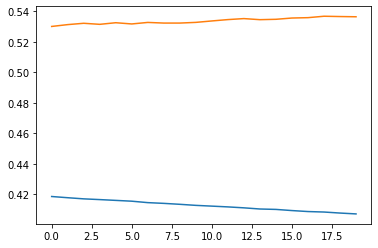

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history['val_loss'])

In [54]:
from sklearn.linear_model._glm.glm import BaseEstimator
# pipeline of model with lr
class labeler(BaseEstimator):
  def _init_(self):
    pass

  def fit(self, documents,y=None):
    return self

  def transform(self,x_data):
    for a in x_data.columns:
      le=preprocessing.LabelEncoder()
      if x_data[a].dtypes=="O":
          labels=list(x_data[a].unique())
          le.fit(labels)
          x_data[a]=le.transform(x_data[a])
    return x_data
def num_tr(x):
  for a in x.columns:
    X[a]=X[a].fillna(value=X[a].mode()[0])
  return x


In [62]:
from sklearn.pipeline import Pipeline as pipe
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier as xgb
from sklearn.metrics import mean_absolute_error

categorical_cols = [cname for cname in X.columns[1:] if X[cname].dtype == "object"]
cat_tr=preprocessing.OneHotEncoder(categories="auto",handle_unknown="ignore")


# Select numerical columns and num transformer
num_tr=SimpleImputer(strategy="mean") 
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
preprocessor= ColumnTransformer(transformers=[("num",num_tr,numerical_cols),
                                              ("cat",cat_tr,categorical_cols),
                                            ],remainder="passthrough")
model=xgb(n_estimators=100,learning_rate=0.1)
my_pipeline=pipe(steps=[("preprocessor",preprocessor),("model",model)])

my_pipeline.fit(X, Y)

valid=pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")
x_valid=valid.iloc[:,1:-1]
y_valid=valid.iloc[:,-1]

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(x_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

ValueError: ignored